In [1]:
import holoviews as hv
import hvplot.pandas
import pandas as pd

hvplot.extension("matplotlib")
data = pd.read_csv("tourists.csv")

In [2]:
data.columns = data.columns.str.strip()

data = data.replace({'returning': {
    'yes': True,
    'no': False
}})

data = data.replace({"?": None})

data.rename(columns={
    "returning": "First Trip",
    "GImg1": "Handshake",
    "GImg2": "Hug",
    "GImg3": "Kiss",
    "PImg1": "Consent posture image",
    "PImg2": "Interest posture image",
    "PImg3": "Neutral posture image",
    "PImg4": "Reflexive posture image",
    "PImg5": "Negative posture image",
    "Tense - relaxed": "Tense or Relaxed",
    "Authoritative -anarchic": "Authoritative or Anarchic",
    "Hostile - friendly": "Hostile or Friendly",
    "Proxemics": "Authoritative Voice",
    "TAudio1": "Proximics",
    "TAudio2": "Sarcastic Voice",
    "TAudio3": "Friendly Voice",
    "QAudio1": "Spitting in Speech",
    "QAudio2": "Humming in Speech",
    "QAudio3": "Sighing in Speech",
    "Type of Client": "Group"
}, inplace=True)

data.columns

/tmp/ipykernel_2490657/568515224.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'returning': {


Index(['sex', 'age', 'country', 'First Trip', 'Handshake', 'Hug', 'Kiss',
       'Consent posture image', 'Interest posture image',
       'Neutral posture image', 'Reflexive posture image',
       'Negative posture image', 'Tense or Relaxed',
       'Authoritative or Anarchic', 'Hostile or Friendly', 'Proximics',
       'Sarcastic Voice', 'Friendly Voice', 'Spitting in Speech',
       'Humming in Speech', 'Sighing in Speech', 'Authoritative Voice',
       'Group'],
      dtype='object')

## Data Dictionary

* `sex`: Respondants indicated sex (M, F)
* `age`: Respondants indicated age
* `First Trip`: If this the first time this respondant has been to this hotel.
* `Handshake`, `Hug`, and `Kiss`: If the respondant likes these types of interactions.
* `Consent posture image`: If the respondant likes the named posture shown to them in an image.
* `Interest posture image`: If the respondant likes the named posture shown to them in an image.
* `Neutral posture image`: If the respondant likes the named posture shown to them in an image.
* `Reflexive posture image`: If the respondant likes the named posture shown to them in an image.
* `Negative posture image`: If the respondant likes the named posture shown to them in an image.
* `Tense or Relaxed`: A sliding scale of how the respondant feels the people they interacted with were. Higher = More Relaxed, while Lower = More Tense. 
* `Authoritative or Anarchic`: A sliding scale of how the respondant feels the people they interacted with were. Higher = More Anarchic, while Lower = More Authorative.
* `Hostile or Friendly`: A sliding scale of how the respondant feels the people they interacted with were. Higher = More Friendly, while Lower = More Hostile.
* `Proximics`: The physical distance preferred by the client
  * `A`: Intimate (`15-45cm`)
  * `B`: Personal (`46-122cm`)
  * `C`: Social (`123-360cm`)
  * `D`: Public (`>360cm`)
* `Sarcastic Voice`: If the respondant likes sarcasm when they're spoken to.
* `Friendly Voice`: If the respondant likes friendliness when they're spoken to.
* `Spitting in Speech`: If the respondant likes spitting in conversations from the person they're speaking to. 
* `Humming in Speech`: If the respondant likes humming in conversations from the person they're speaking to.
* `Sighing in Speech`: If the respondant likes sighing in conversations from the person they're speaking to.
* `Authoriative Voice`: If the respondant likes authoritarianism when they're spoken to.
* `Group`: What experiment group the client fell into.

## Age Distribution

### What is the average age of the surveyed customers?

In [3]:
average_age = data['age'].mean()
average_age

47.26027397260274

The average age in the surveyed customers is about 47.26 years old.

### How variable is the age distribution among the surveyed customers?

In [4]:
age_variance = data['age'].var()
age_std_dev = data['age'].std()
age_variance, age_std_dev

(228.47298325722983, 15.115322796990801)

The variance of age in the surveyed customers is approximiately 228.73 with a standard deviation of approximately 15.11 years.

:Histogram   [age]   (age_count)
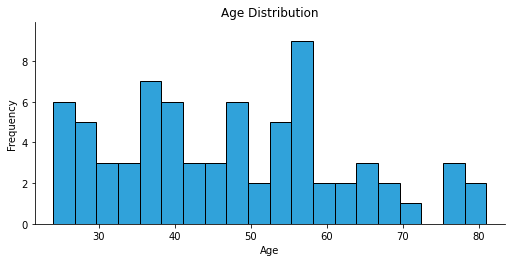

In [5]:
data['age'].hvplot.hist(
    title="Age Distribution",
    xlabel='Age', 
    ylabel='Frequency',
)

# Tense vs Relaxed

In [6]:
tvr_max = data['Tense or Relaxed'].max()
tvr_min = data['Tense or Relaxed'].min()

(tvr_min, tvr_max)

(1, 5)

This value appears to be between 1 and 5, not the expected 1 to 10. This is important to keep in mind.

In [7]:
median_tense_relaxed = data['Tense or Relaxed'].median()
median_tense_relaxed

2.0

Surveyed customers identified that employees mostly remained tense during the experiment.

In [8]:
proximic_preferences = data['Proximics'].mode()[0]
proximic_preferences

'B'

The most preferred Proximics category among the surveyed customers is "Personal" or distances from 46cm to 122cm

In [9]:
proximic_counts = data['Proximics'].value_counts().reindex(['A', 'B', 'C', 'D'])
proximic_counts

Proximics
A    23
B    28
C    19
D     3
Name: count, dtype: int64

The rest of the proximics are as follows:

A: Intimate (`15-45cm`) - 23

B: Personal (`46-122cm`) - 28

C: Social (`123-360cm`) - 19

D: Public (`>360cm`) - 3

:Bars   [Proximics]   (count)
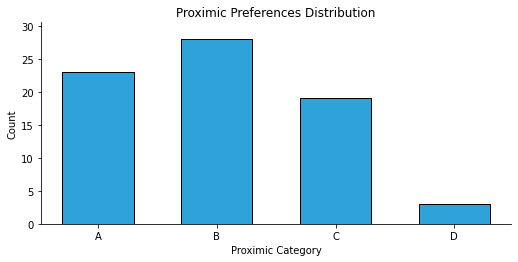

In [10]:
proximic_counts.hvplot.bar(
    title='Proximic Preferences Distribution',
    xlabel='Proximic Category',
    ylabel='Count',
)

# Correlation Matrix

In [11]:
numeric_columns = ['age', 'Tense or Relaxed', 'Authoritative or Anarchic', 'Hostile or Friendly']

categorical_columns = [col for col in data.columns if col not in numeric_columns]

df_numeric = data[numeric_columns]
df_encoded = pd.get_dummies(data[categorical_columns], drop_first=True)

correlation_matrix = pd.concat([df_numeric, df_encoded], axis=1).corr()

We're working with a LOT of numbers. So let's find the strongest positive and negative correlations programatically.

In [12]:
CORRS_TO_FIND = 3

corrs_top_positive = (correlation_matrix[correlation_matrix < 1.0].stack().nlargest(CORRS_TO_FIND * 2))   # We're going to get the same pairs twice (a,b) and (b,a)
corrs_top_negative = (correlation_matrix[correlation_matrix > -1.0].stack().nsmallest(CORRS_TO_FIND * 2)) # We're going to get the same pairs twice (a,b) and (b,a)

corrs_all_top = pd.concat([corrs_top_positive, corrs_top_negative])
corrs_all_top.drop_duplicates(keep='last')

Neutral posture image_likes  Handshake_likes                      0.738529
Sighing in Speech_likes      Negative posture image_indiferent    0.702179
Kiss_likes                   Hug_likes                            0.669456
Handshake_likes              Handshake_indiferent                -0.812366
Spitting in Speech_likes     Spitting in Speech_indiferent       -0.723102
Hug_likes                    Hug_indiferent                      -0.703427
dtype: float64

Much better :)

We can see there is a strong positive correlation between people who liked the neutral posture image and being handshaken. This is a relatively boring conclusion, much more interestingly: those who liked people who speaking to them sighing didn't like the negative posture image.

# Statistical Analysis

Can we prove that this test was truly random?

## Hypothesis:

* Null Hypothesis (H0): The average ages of the groups are equal.
* Alternative Hypothesis (H1): At least one of the groups has a different average age.

## Statistical Analysis:

* Independent Variable: 'Type of Client' (Categorical with 6 levels 0-5)
* Dependent Variable: 'Age'
* Significance Level (α): 0.05

## Analytical Questions

> Is there significant evidence to reject the null hypothesis that the average ages of the three groups are equal?

There is significant evidence to reject the null hypothesis that the average ages of the groups are equal. The one-way ANOVA test yielded a statistically significant result (F-statistic = 2.84, p-value = 0.0218), indicating differences in average ages among the groups.

> What is the result of the ANOVA test? Do we reject or fail to reject the null hypothesis?

The result of the one-way ANOVA test is statistically significant (p-value = 0.0218). Therefore, we reject the null hypothesis, suggesting that there are significant differences in average ages among the groups.

> If the ANOVA test indicates significant differences, which specific groups have different average ages?

Post-hoc analysis using Tukey's Honestly Significant Difference (HSD) test was conducted to identify specific group differences. The Tukey's HSD results reveal pairwise comparisons of average ages between different customer groups. 

In [21]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

f_stat, p_value_anova = f_oneway(
    data['age'][data['Group'] == 0].dropna(),
    data['age'][data['Group'] == 1].dropna(),
    data['age'][data['Group'] == 2].dropna(),
    data['age'][data['Group'] == 3].dropna(),
    data['age'][data['Group'] == 4].dropna(),
    data['age'][data['Group'] == 5].dropna())

# Perform post-hoc Tukey's HSD test if ANOVA is significant
if p_value_anova < 0.05:
    tukey_results = pairwise_tukeyhsd(data['age'].dropna(), data['Group'].dropna(), alpha=0.05)

f_stat, p_value_anova, tukey_results

(2.8426341248748255,
 0.021825497755321794,
 <statsmodels.sandbox.stats.multicomp.TukeyHSDResults at 0x72142060b2d0>)

In [22]:
tukey_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,3.5,0.9991,-24.5096,31.5096,False
0,2,12.8611,0.4151,-7.0666,32.7888,False
0,3,8.2,0.8983,-14.6697,31.0697,False
0,4,-1.3571,1.0,-23.1106,20.3963,False
0,5,-2.5,0.9998,-30.5096,25.5096,False
1,2,9.3611,0.8115,-12.6453,31.3675,False
1,3,4.7,0.9933,-20.0021,29.4021,False
1,4,-4.8571,0.9905,-28.5296,18.8153,False
1,5,-6.0,0.991,-35.5247,23.5247,False
2,3,-4.6611,0.941,-19.5866,10.2644,False
